# Annotation Analysis

Finding answer to:
    - How complete is OSM data in comparison to rich place knowledge in leisure walks?
    - How selective people are considering selected POIs in lesiure walks and available POIs nearby?
    - Can a machine immitate this selective behaviour?

Aspects considered:

    1. POIs belong to classes identified in previous step
    2. OSM keys of POI
    3. lesiure walk ID as a proxy to consider individual preferences and styles


## Setup

In [1]:
# working with files
import os.path
# sys
import sys

# warning off
import warnings
# IO
import json

# requests
import requests

# dataframe 
import numpy as np
import pandas as pd
import geopandas as gpd


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# logging
from loguru import logger

# set logger level
logger.remove(0)
logger.add(sys.stderr, level="INFO")

warnings.filterwarnings("ignore")

## Loading OSM POIs and Annotations

In [19]:
with open('dataset/walkingmaps.json', 'r', encoding='utf-8') as fp:
    dataset = json.load(fp)

data_structure = {
    'record_id': [], 'record_title':[], 'record_description':[],
    'poi_title':[], 'poi_summary':[], 'latitude': [], 'longitude': []}

for record_id, record in enumerate(dataset):
    if 'pois' in record.keys() and len(record['pois']) > 0:
        for poi in record['pois']:
            data_structure['record_id'].append(record_id)
            data_structure['record_title'].append(record['title'])
            data_structure['record_description'].append(record['description'])
            data_structure['poi_title'].append(poi['title'])
            data_structure['poi_summary'].append(poi['summary'])
            data_structure['latitude'].append(poi['lat'])
            data_structure['longitude'].append(poi['lng'])

df = pd.DataFrame(data_structure)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf.head()

record_id                                       record_title  \
0          1  Fairhaven to Aireys Inlet Walk created by tedm...   
1          1  Fairhaven to Aireys Inlet Walk created by tedm...   
2          1  Fairhaven to Aireys Inlet Walk created by tedm...   
3          1  Fairhaven to Aireys Inlet Walk created by tedm...   
4          1  Fairhaven to Aireys Inlet Walk created by tedm...   

                                  record_description  \
0  Apart from the points of interested listed, he...   
1  Apart from the points of interested listed, he...   
2  Apart from the points of interested listed, he...   
3  Apart from the points of interested listed, he...   
4  Apart from the points of interested listed, he...   

                         poi_title  \
0  Fairhaven Surf Life Saving Club   
1                       Beach walk   
2                       Rock pools   
3                       Sand dunes   
4                  Painkalac Creek   

                                         poi_summary   latitude   longitude  \
0  Fairhaven is a well known surf beach. The beac... -38.468759  144.084459   
1  From Sprout Creek, Eastern View, Moggs Creek, ... -38.468542  144.089693   
2  See what sort of shells and stones you can col... -38.468459  144.092420   
3  The beautiful rolling sand dunes shape the bea... -38.468418  144.095318   
4  The creek separates Aireys Inlet from Fairhave... -38.468390  144.097312   

                      geometry  
0  POINT (144.08446 -38.46876)  
1  POINT (144.08969 -38.46854)  
2  POINT (144.09242 -38.46846)  
3  POINT (144.09532 -38.46842)  
4  POINT (144.09731 -38.46839)

In [20]:
gdf.reset_index()

index  record_id                                       record_title  \
0         0          1  Fairhaven to Aireys Inlet Walk created by tedm...   
1         1          1  Fairhaven to Aireys Inlet Walk created by tedm...   
2         2          1  Fairhaven to Aireys Inlet Walk created by tedm...   
3         3          1  Fairhaven to Aireys Inlet Walk created by tedm...   
4         4          1  Fairhaven to Aireys Inlet Walk created by tedm...   
...     ...        ...                                                ...   
4387   4387        386  Mill Park Reserve Walk created by HealthyTogether   
4388   4388        386  Mill Park Reserve Walk created by HealthyTogether   
4389   4389        386  Mill Park Reserve Walk created by HealthyTogether   
4390   4390        386  Mill Park Reserve Walk created by HealthyTogether   
4391   4391        386  Mill Park Reserve Walk created by HealthyTogether   

                                     record_description  \
0     Apart from the points of interested listed, he...   
1     Apart from the points of interested listed, he...   
2     Apart from the points of interested listed, he...   
3     Apart from the points of interested listed, he...   
4     Apart from the points of interested listed, he...   
...                                                 ...   
4387  The Mill Park Reserve walking loop is a mix of...   
4388  The Mill Park Reserve walking loop is a mix of...   
4389  The Mill Park Reserve walking loop is a mix of...   
4390  The Mill Park Reserve walking loop is a mix of...   
4391  The Mill Park Reserve walking loop is a mix of...   

                              poi_title  \
0       Fairhaven Surf Life Saving Club   
1                            Beach walk   
2                            Rock pools   
3                            Sand dunes   
4                       Painkalac Creek   
...                                 ...   
4387               Lots of native flora   
4388  Continue the loop or go elsewhere   
4389                 Residential Street   
4390             The Stables Playground   
4391                    Plenty of seats   

                                            poi_summary   latitude  \
0     Fairhaven is a well known surf beach. The beac... -38.468759   
1     From Sprout Creek, Eastern View, Moggs Creek, ... -38.468542   
2     See what sort of shells and stones you can col... -38.468459   
3     The beautiful rolling sand dunes shape the bea... -38.468418   
4     The creek separates Aireys Inlet from Fairhave... -38.468390   
...                                                 ...        ...   
4387  There are many native trees planted or protect... -37.655068   
4388  There are plenty of signs to let you know wher... -37.650457   
4389  This section of the walk takes you along a res... -37.652224   
4390  This playground is huge and very cool! Hours o... -37.655012   
4391  There are plenty of seats along the way, both ... -37.655987   

       longitude                     geometry  
0     144.084459  POINT (144.08446 -38.46876)  
1     144.089693  POINT (144.08969 -38.46854)  
2     144.092420  POINT (144.09242 -38.46846)  
3     144.095318  POINT (144.09532 -38.46842)  
4     144.097312  POINT (144.09731 -38.46839)  
...          ...                          ...  
4387  145.054786  POINT (145.05479 -37.65507)  
4388  145.057868  POINT (145.05787 -37.65046)  
4389  145.056435  POINT (145.05643 -37.65222)  
4390  145.059287  POINT (145.05929 -37.65501)  
4391  145.054470  POINT (145.05447 -37.65599)  

[4392 rows x 9 columns]

In [21]:
poi_classified = pd.read_csv('outputs/dataframes/refined-topic-poi-description-classified.csv')
poi_classified.head()

Unnamed: 0  index  topic  \
0           0      0      2   
1           1      1      2   
2           2      3      2   
3           3     96      2   
4           4     99      2   

                                            document  is_found class  Count  \
0  Surf Life Saving Club: is a well known surf be...     False   NaN    148   
1  Beach walk: From Sprout Creek, , , to the bott...     False   NaN    148   
2  Sand dunes: The beautiful rolling sand dune sh...     False   NaN    148   
3  Surf' up: A good spot to watch the surf, have ...     False   NaN    148   
4  Heading down to the beach: Follow the track, w...     False   NaN    148   

                    Name                                     Representation  \
0  2_beach_bay_sand_tide  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
1  2_beach_bay_sand_tide  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
2  2_beach_bay_sand_tide  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
3  2_beach_bay_sand_tide  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
4  2_beach_bay_sand_tide  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   

                                 Representative_Docs  Class ID   Class  \
0  ['Apollo Bay beach: The beach is most sheltere...         0  nature   
1  ['Apollo Bay beach: The beach is most sheltere...         0  nature   
2  ['Apollo Bay beach: The beach is most sheltere...         0  nature   
3  ['Apollo Bay beach: The beach is most sheltere...         0  nature   
4  ['Apollo Bay beach: The beach is most sheltere...         0  nature   

            Subclass  
0  natural landmarks  
1  natural landmarks  
2  natural landmarks  
3  natural landmarks  
4  natural landmarks

In [22]:
detailed_df = pd.merge(gdf.reset_index(), poi_classified, left_on='index', right_on='index', how='inner')

In [23]:
projected_df = detailed_df[['index', 'record_id', 
       'poi_title', 'poi_summary', 'topic', 'Class', 'Class ID', 'Count',
       'Name', 'Representation', 'Representative_Docs', 'Subclass']]

projected_df['Subclass_cat'] = projected_df['Subclass'].astype('category')
projected_df.head()

index  record_id                        poi_title  \
0      0          1  Fairhaven Surf Life Saving Club   
1      1          1                       Beach walk   
2      2          1                       Rock pools   
3      3          1                       Sand dunes   
4      4          1                  Painkalac Creek   

                                         poi_summary  topic   Class  Class ID  \
0  Fairhaven is a well known surf beach. The beac...      2  nature         0   
1  From Sprout Creek, Eastern View, Moggs Creek, ...      2  nature         0   
2  See what sort of shells and stones you can col...      1  nature         0   
3  The beautiful rolling sand dunes shape the bea...      2  nature         0   
4  The creek separates Aireys Inlet from Fairhave...     23  nature         0   

   Count                          Name  \
0    148         2_beach_bay_sand_tide   
1    148         2_beach_bay_sand_tide   
2    153    1_bird_duck_birdlife_ducks   
3    148         2_beach_bay_sand_tide   
4     37  23_creek_frost_leary_running   

                                      Representation  \
0  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
1  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
2  ['bird', 'duck', 'birdlife', 'ducks', 'feng', ...   
3  ['beach', 'bay', 'sand', 'tide', 'coastal', 'c...   
4  ['creek', 'frost', 'leary', 'running', 'toomuc...   

                                 Representative_Docs           Subclass  \
0  ['Apollo Bay beach: The beach is most sheltere...  natural landmarks   
1  ['Apollo Bay beach: The beach is most sheltere...  natural landmarks   
2  ['Black s: Keep an eye out for the birdlife at...     flora and funa   
3  ['Apollo Bay beach: The beach is most sheltere...  natural landmarks   
4  ['Creek: The reserve ha two creek running thro...  natural landmarks   

        Subclass_cat  
0  natural landmarks  
1  natural landmarks  
2     flora and funa  
3  natural landmarks  
4  natural landmarks

In [24]:
projected_df['Subclass_id'] = projected_df['Subclass_cat'].cat.codes

**Question**: What's the correlation between walk id and types of POIs mentioned in the walk?

We can then answer whether walks are mainly mixed or have a dominant theme in terms of POIs

In [25]:
import association_metrics as am

categorical_df = projected_df[['record_id', 'topic', 'Subclass_id', 'Class ID']].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(categorical_df) 
cramersv.fit()

record_id    topic  Subclass_id  Class ID
record_id     1.000000  0.39389      0.44724  0.479423
topic         0.393890  1.00000      1.00000  1.000000
Subclass_id   0.447240  1.00000      1.00000  1.000000
Class ID      0.479423  1.00000      1.00000  1.000000

### NOTE
A considerable number of leisure walk has a dominant theme that can be described through the type of POI mentioned in it. High Cramér's V correlation between the categorical variables.

In [26]:
record_topics_df = categorical_df.groupby('record_id')['topic'].apply(list).reset_index(name='topics')
record_subclass_df = categorical_df.groupby('record_id')['Subclass_id'].apply(list).reset_index(name='Subclass_id')
record_class_df = categorical_df.groupby('record_id')['Class ID'].apply(list).reset_index(name='Class ID')

record_all_info_df = pd.merge(pd.merge(record_topics_df, record_subclass_df, how='inner'), record_class_df, how='inner')
record_all_info_df.head()

record_id                                             topics  \
0         1             [2, 2, 1, 2, 23, 38, 28, 35, 68, 8, 0]   
1         2  [65, 31, 60, 60, 10, 31, 11, 8, 8, 13, 11, 11,...   
2         3  [59, 68, 4, 10, 40, 32, 40, 8, 8, 8, 12, 37, 1...   
3         4  [25, 51, 36, 23, 11, 6, 6, 51, 16, 71, 4, 34, ...   
4         5  [8, 3, 2, 19, 12, 2, 2, 31, 2, 31, 0, 1, 70, 3...   

                                         Subclass_id  \
0                 [6, 6, 2, 6, 6, 6, 8, 1, 10, 0, 9]   
1  [0, 7, 4, 4, 0, 7, 4, 0, 0, 0, 4, 4, 4, 4, 7, ...   
2  [1, 10, 9, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 4,...   
3  [0, 0, 10, 6, 4, 7, 7, 0, 7, 1, 9, 6, 0, 7, 9,...   
4  [0, 3, 6, 6, 6, 6, 6, 7, 6, 7, 9, 2, 5, 7, 6, ...   

                                            Class ID  
0                  [0, 0, 0, 0, 0, 0, 1, 1, 4, 2, 3]  
1  [2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, ...  
2  [1, 4, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, ...  
3  [2, 2, 4, 0, 2, 1, 1, 2, 1, 1, 3, 0, 2, 1, 3, ...  
4  [2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 3, 1, 0, ...

In [27]:
def make_full_vector_representation(sparse_representation, dim, starter):
    res = [0 for i in range(dim)]
    for topic in sparse_representation:
        res[topic+starter] += 1
    return res

def make_full_topic_vector(row):
    row['full_rep'] = make_full_vector_representation(row['topics'], dim=75, starter=1)
    return row

record_topics_full_df = record_topics_df.apply(make_full_topic_vector, axis=1)
record_topics_full_df = record_topics_full_df[['record_id', 'full_rep']]
record_topics_full_df

record_id                                           full_rep
0            1  [0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
1            2  [0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 1, 5, 0, 1, ...
2            3  [0, 0, 0, 0, 0, 1, 0, 0, 0, 12, 0, 8, 1, 1, 4,...
3            4  [0, 0, 0, 0, 0, 5, 0, 3, 0, 0, 0, 0, 1, 0, 0, ...
4            5  [0, 1, 1, 5, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, ...
..         ...                                                ...
381        382  [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
382        383  [0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
383        384  [0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
384        385  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
385        386  [0, 6, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, ...

[386 rows x 2 columns]

In [28]:
record_topics_full_df[[f'topic_{i}' for i in range(75)]] = record_topics_full_df['full_rep'].tolist()
record_topics_full_df[['record_id']+[f'topic_{i}' for i in range(75)]].head()

record_id  topic_0  topic_1  topic_2  topic_3  topic_4  topic_5  topic_6  \
0          1        0        1        1        3        0        0        0   
1          2        0        0        0        0        0        0        0   
2          3        0        0        0        0        0        1        0   
3          4        0        0        0        0        0        5        0   
4          5        0        1        1        5        1        0        0   

   topic_7  topic_8  ...  topic_65  topic_66  topic_67  topic_68  topic_69  \
0        0        0  ...         0         0         0         0         1   
1        1        1  ...         0         1         0         0         0   
2        0        0  ...         0         0         0         0         1   
3        3        0  ...         0         1         0         0         0   
4        0        0  ...         0         0         0         0         0   

   topic_70  topic_71  topic_72  topic_73  topic_74  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         1         0         0  
4         0         1         0         0         0  

[5 rows x 76 columns]

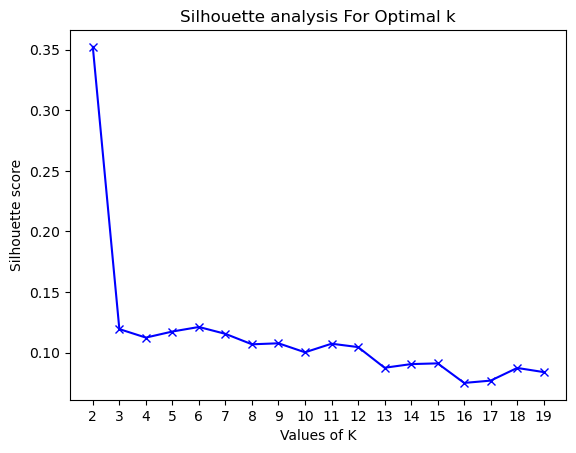

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [i for i in range(2,20)]
silhouette_avg = []
for num_clusters in range_n_clusters:
     # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, random_state = 42)
    kmeans.fit(record_topics_full_df[[f'topic_{i}' for i in range(75)]])
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(record_topics_full_df[[f'topic_{i}' for i in range(75)]], cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')    
plt.xticks(range_n_clusters)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [30]:
optimal_n = 6
kmeans = KMeans(n_clusters=optimal_n, init='k-means++', max_iter=100, n_init=1, random_state =42)
kmeans.fit(record_topics_full_df[[f'topic_{i}' for i in range(75)]])
cluster_labels = kmeans.labels_
centroids  = kmeans.cluster_centers_
record_topics_full_df['topics_cluster_label'] = cluster_labels

In [31]:
record_all_info_df['topics_cluster_label'] = cluster_labels
record_all_info_df.head()

record_id                                             topics  \
0         1             [2, 2, 1, 2, 23, 38, 28, 35, 68, 8, 0]   
1         2  [65, 31, 60, 60, 10, 31, 11, 8, 8, 13, 11, 11,...   
2         3  [59, 68, 4, 10, 40, 32, 40, 8, 8, 8, 12, 37, 1...   
3         4  [25, 51, 36, 23, 11, 6, 6, 51, 16, 71, 4, 34, ...   
4         5  [8, 3, 2, 19, 12, 2, 2, 31, 2, 31, 0, 1, 70, 3...   

                                         Subclass_id  \
0                 [6, 6, 2, 6, 6, 6, 8, 1, 10, 0, 9]   
1  [0, 7, 4, 4, 0, 7, 4, 0, 0, 0, 4, 4, 4, 4, 7, ...   
2  [1, 10, 9, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 4,...   
3  [0, 0, 10, 6, 4, 7, 7, 0, 7, 1, 9, 6, 0, 7, 9,...   
4  [0, 3, 6, 6, 6, 6, 6, 7, 6, 7, 9, 2, 5, 7, 6, ...   

                                            Class ID  topics_cluster_label  
0                  [0, 0, 0, 0, 0, 0, 1, 1, 4, 2, 3]                     3  
1  [2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, ...                     5  
2  [1, 4, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, ...                     5  
3  [2, 2, 4, 0, 2, 1, 1, 2, 1, 1, 3, 0, 2, 1, 3, ...                     1  
4  [2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 3, 1, 0, ...                     3

In [32]:
[str(i) for i in list(projected_df['Class ID'].unique())]

['0', '1', '4', '2', '3']

In [33]:
from collections import Counter

def find_share(list_vals):
    counted_vals = dict(Counter(list_vals))
    sum_vals = sum(counted_vals.values())
    return {str(key):round((val/sum_vals)*100, 2) for key,val in counted_vals.items()}

unique_classes = [str(i) for i in list(projected_df['Class ID'].unique())]
unique_subclasses = [str(i) for i in list(projected_df['Subclass_id'].unique())]


def analyze_classes(row):
    class_shares = find_share(row['Class ID'])
    for cid in unique_classes:
        if cid not in class_shares.keys():
            class_shares[cid] = 0
    row['class_shares'] = class_shares


    subclass_shares = find_share(row['Subclass_id'])
    for cid in unique_subclasses:
        if cid not in subclass_shares.keys():
            subclass_shares[cid] = 0
    row['subclass_shares'] = subclass_shares

    return row

record_all_analyzed = record_all_info_df.apply(analyze_classes, axis=1)
record_all_analyzed

record_id                                             topics  \
0            1             [2, 2, 1, 2, 23, 38, 28, 35, 68, 8, 0]   
1            2  [65, 31, 60, 60, 10, 31, 11, 8, 8, 13, 11, 11,...   
2            3  [59, 68, 4, 10, 40, 32, 40, 8, 8, 8, 12, 37, 1...   
3            4  [25, 51, 36, 23, 11, 6, 6, 51, 16, 71, 4, 34, ...   
4            5  [8, 3, 2, 19, 12, 2, 2, 31, 2, 31, 0, 1, 70, 3...   
..         ...                                                ...   
381        382                     [26, 12, 57, 22, 51, 3, 3, 57]   
382        383           [24, 0, 5, 17, 33, 1, 32, 40, 68, 43, 1]   
383        384                [0, 0, 36, 27, 1, 1, 1, 69, 14, 18]   
384        385               [39, 29, 65, 37, 29, 37, 29, 22, 47]   
385        386  [6, 0, 26, 21, 0, 50, 0, 0, 15, 18, 6, 5, 0, 0...   

                                           Subclass_id  \
0                   [6, 6, 2, 6, 6, 6, 8, 1, 10, 0, 9]   
1    [0, 7, 4, 4, 0, 7, 4, 0, 0, 0, 4, 4, 4, 4, 7, ...   
2    [1, 10, 9, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 4,...   
3    [0, 0, 10, 6, 4, 7, 7, 0, 7, 1, 9, 6, 0, 7, 9,...   
4    [0, 3, 6, 6, 6, 6, 6, 7, 6, 7, 9, 2, 5, 7, 6, ...   
..                                                 ...   
381                          [10, 6, 8, 0, 0, 3, 3, 8]   
382                 [2, 9, 2, 2, 2, 2, 4, 0, 10, 2, 2]   
383                    [9, 9, 10, 9, 2, 2, 2, 2, 6, 7]   
384                        [1, 0, 0, 0, 0, 0, 0, 0, 4]   
385  [7, 9, 10, 7, 9, 1, 9, 9, 7, 7, 7, 2, 9, 9, 7, 7]   

                                              Class ID  topics_cluster_label  \
0                    [0, 0, 0, 0, 0, 0, 1, 1, 4, 2, 3]                     3   
1    [2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, ...                     5   
2    [1, 4, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, ...                     5   
3    [2, 2, 4, 0, 2, 1, 1, 2, 1, 1, 3, 0, 2, 1, 3, ...                     1   
4    [2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 3, 1, 0, ...                     3   
..                                                 ...                   ...   
381                           [4, 0, 1, 2, 2, 1, 1, 1]                     0   
382                  [0, 3, 0, 0, 0, 0, 2, 2, 4, 0, 0]                     2   
383                     [3, 3, 4, 3, 0, 0, 0, 0, 0, 1]                     2   
384                        [1, 2, 2, 2, 2, 2, 2, 2, 2]                     1   
385   [1, 3, 4, 1, 3, 1, 3, 3, 1, 1, 1, 0, 3, 3, 1, 1]                     2   

                                          class_shares  \
0    {'0': 54.55, '1': 18.18, '4': 9.09, '2': 9.09,...   
1     {'2': 81.82, '1': 18.18, '0': 0, '4': 0, '3': 0}   
2    {'1': 2.63, '4': 2.63, '3': 2.63, '2': 89.47, ...   
3    {'2': 26.09, '4': 4.35, '0': 8.7, '1': 39.13, ...   
4    {'2': 10.53, '1': 26.32, '0': 52.63, '3': 10.5...   
..                                                 ...   
381  {'4': 12.5, '0': 12.5, '1': 50.0, '2': 25.0, '...   
382  {'0': 63.64, '3': 9.09, '2': 18.18, '4': 9.09,...   
383  {'3': 30.0, '4': 10.0, '0': 50.0, '1': 10.0, '...   
384   {'1': 11.11, '2': 88.89, '0': 0, '4': 0, '3': 0}   
385  {'1': 50.0, '3': 37.5, '4': 6.25, '0': 6.25, '...   

                                       subclass_shares  
0    {'6': 45.45, '2': 9.09, '8': 9.09, '1': 9.09, ...  
1    {'0': 36.36, '7': 18.18, '4': 45.45, '6': 0, '...  
2    {'1': 2.63, '10': 2.63, '9': 2.63, '0': 76.32,...  
3    {'0': 21.74, '10': 4.35, '6': 8.7, '4': 4.35, ...  
4    {'0': 10.53, '3': 5.26, '6': 42.11, '7': 21.05...  
..                                                 ...  
381  {'10': 12.5, '6': 12.5, '8': 25.0, '0': 25.0, ...  
382  {'2': 63.64, '9': 9.09, '4': 9.09, '0': 9.09, ...  
383  {'9': 30.0, '10': 10.0, '2': 40.0, '6': 10.0, ...  
384  {'1': 11.11, '0': 77.78, '4': 11.11, '6': 0, '...  
385  {'7': 43.75, '9': 37.5, '10': 6.25, '1': 6.25,...  

[386 rows x 7 columns]

In [34]:
def find_all_shares(df):
    all_class_shares = list(df['class_shares'])
    all_class_shares_dict = {k:[] for k in unique_classes}
    for c_share in all_class_shares:
        for key, val in c_share.items():
            all_class_shares_dict[key].append(val)
    
    
    all_subclass_shares = list(df['subclass_shares'])
    all_subclass_shares_dict = {k:[] for k in unique_subclasses}
    for sc_share in all_subclass_shares:
        for key, val in sc_share.items():
            all_subclass_shares_dict[key].append(val)

    return all_class_shares_dict, all_subclass_shares_dict

In [35]:
agg_series = record_all_analyzed[['topics_cluster_label', 'class_shares', 'subclass_shares']].groupby(['topics_cluster_label']).apply(find_all_shares)
agg_series

topics_cluster_label
0    ({'0': [0, 20.0, 12.5, 0, 0, 8.33, 0, 16.67, 0...
1    ({'0': [8.7, 11.11, 22.22, 100.0, 85.71, 20.0,...
2    ({'0': [55.56, 76.92, 40.91, 18.18, 33.33, 69....
3    ({'0': [54.55, 52.63, 65.0, 78.57, 66.67, 87.5...
4    ({'0': [100.0, 70.59, 50.0, 61.54, 93.33, 100....
5    ({'0': [0, 2.63, 2.86, 0, 0, 10.0, 8.33, 3.45,...
dtype: object

In [36]:
class_mapping = {'0': 'nature', '1': 'activities', '2': 'society', '3': 'transport', '4': 'unknown'}
class_mapping_order = ['nature', 'activities', 'society', 'transport', 'unknown']

subclass_mapping = {str(cat_id):str(list(projected_df['Subclass_cat'])[idx]) for idx, cat_id in enumerate(list(projected_df['Subclass_cat'].cat.codes))}
subclass_mapping_order = ['flora and funa', 'natural landmarks',
                          'fishing to surfing', 'picnic area', 'food and beverage', 'sport complexes',
                          'human made landmarks', 'art, history and culture', 
                          'trail-path-and-canal', 'lines and stations',
                          'unknown']

def study_a_cluster(cluster_idx):
    class_distributions_df = pd.DataFrame(agg_series[cluster_idx][0]).rename(columns=class_mapping)
    class_stats = class_distributions_df[class_mapping_order].describe()

    class_distributions_df = pd.DataFrame(agg_series[cluster_idx][1]).rename(columns=subclass_mapping)
    subclass_stats = class_distributions_df[subclass_mapping_order].describe()
    return class_stats, subclass_stats

In [37]:
# cluster_idx = 0  # flora and fauna/nature main theme [trail/transport + picnic/activities]
# class_stats, subclass_stats = study_a_cluster(cluster_idx)
# print(class_stats)
# subclass_stats

In [38]:
# cluster_idx = 1  # natural landmarks/nature as main theme + trails/transport + fishing-to-surfing/activities
# class_stats, subclass_stats = study_a_cluster(cluster_idx)
# print(class_stats)
# subclass_stats

In [39]:
# cluster_idx = 2  # all about trail, path and canals...
# class_stats, subclass_stats = study_a_cluster(cluster_idx)
# print(class_stats)
# subclass_stats

In [40]:
# cluster_idx = 3  # a mixture of everything
# class_stats, subclass_stats = study_a_cluster(cluster_idx)
# print(class_stats)
# subclass_stats

In [41]:
# cluster_idx = 4  # NOTE: more on society than activities and nature: human man-made features and art, history and culture...
# class_stats, subclass_stats = study_a_cluster(cluster_idx)
# print(class_stats)
# subclass_stats

#### NOTE:

How to visualize the results to express the leisure walks and the compositions of POI categories...

### Types of Leisure Walks Based on POI profiles

#### Looking into number of walks/POIs in each cluster

In [42]:
def count_cluster_POIs(cluster_id):
    record_ids = list(np.where(cluster_labels == cluster_id)[0])
    walk_count = len(detailed_df[detailed_df['record_id'].isin(record_ids)]['record_description'].unique())
    poi_count = len(detailed_df[detailed_df['record_id'].isin(record_ids)]['poi_summary'])
    print('{0}: number of walks {1} - number of POIs {2}'.format(cluster_id, walk_count, poi_count))

In [43]:
for i in [0,1,2,3,4,5]:
    count_cluster_POIs(i)

0: number of walks 19 - number of POIs 224
1: number of walks 248 - number of POIs 2736
2: number of walks 56 - number of POIs 659
3: number of walks 29 - number of POIs 324
4: number of walks 14 - number of POIs 179
5: number of walks 19 - number of POIs 254


#### Note
Out of 385 walks, and 4,306 POIs

Stats shows similar results to record_id correlation to topics, subclasses and classes

    - 157 walks with single theme (~41%)
    - 228 walks with mixed theme (~59%)


#### Looking into POI and Walk Descriptions

In [44]:
detailed_df.columns

Index(['index', 'record_id', 'record_title', 'record_description', 'poi_title',
       'poi_summary', 'latitude', 'longitude', 'geometry', 'Unnamed: 0',
       'topic', 'document', 'is_found', 'class', 'Count', 'Name',
       'Representation', 'Representative_Docs', 'Class ID', 'Class',
       'Subclass'],
      dtype='object')

In [45]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords.words('english')

def prune_text(text):
    filtered_words = [word for word in text.split() if word not in stopwords.words('english') and len(word) > 3]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ehsanhamzei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# word clouds of walk description/POI descriptions
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords=stopwords.words('english')).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [47]:
def extract_cluster_description_text(cluster_id, prune=True):
    record_ids = list(np.where(cluster_labels == cluster_id)[0])
    walk_description_text = '\n'.join(list(detailed_df[detailed_df['record_id'].isin(record_ids)]['record_description'].unique()))

    POI_description_text = '\n'.join(list(detailed_df[detailed_df['record_id'].isin(record_ids)]['poi_summary']))

    if prune:
        return prune_text(walk_description_text), prune_text(POI_description_text)
    return walk_description_text, POI_description_text

### Compute TF/IDF

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

ps = []
ws = []
for cluster_idx in [0,1,2,3,4]:
    w, p = extract_cluster_description_text(cluster_idx)
    ps.append(p)
    ws.append(w)

In [49]:
cv=CountVectorizer() 

pword_count_vector=cv.fit_transform(ps)
ptfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
ptfidf_transformer.fit(pword_count_vector)

p_df_idf = pd.DataFrame(ptfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"])

# sort ascending 
p_df_idf.sort_values(by=['idf_weights'])


# count matrix 
pcount_vector=cv.transform(ps) 

# tf-idf scores 
ptf_idf_vector=ptfidf_transformer.transform(pcount_vector)

feature_names = cv.get_feature_names_out() 


p0_document_vector=ptf_idf_vector[0] 
p0df = pd.DataFrame(p0_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [50]:
p1_document_vector=ptf_idf_vector[1] 
p1df = pd.DataFrame(p1_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [51]:
p2_document_vector=ptf_idf_vector[2] 
p2df = pd.DataFrame(p2_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [52]:
p3_document_vector=ptf_idf_vector[3] 
p3df = pd.DataFrame(p3_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [53]:
p4_document_vector=ptf_idf_vector[4] 
p4df = pd.DataFrame(p4_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [54]:
p12df = pd.merge(p1df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster2'}),
                 p2df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster1'}), how='inner')
p012df = pd.merge(p0df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster0'}),
                 p12df, how='inner')
p34df = pd.merge(p4df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster4'}),
                 p3df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster3'}), how='inner')
p_all_df = pd.merge(p34df, p012df, how='inner')[['word', 'cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']]

In [55]:
filter_shared_words = list((p_all_df[(p_all_df[['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']]>0.05).all(axis=1)])['word'])

In [56]:
filter_stop_words = list((p_all_df[(p_all_df[['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']]<0.05).all(axis=1)])['word'])

In [57]:
filters = filter_shared_words + filter_stop_words

In [58]:
p_all_df[~p_all_df['word'].isin(filters)].to_csv('outputs/dataframes/raw_cluster_words.csv')

## Annotated OSM results

We have:

    - OSM POIs in bounding box
    - OSM POIs in buffer zone of LW POIs
    - matched/unmatched POIs 

In [59]:
api_endpoint = 'https://www.openstreetmap.org/api/0.6/{0}/{1}.json'
headers = {"Content-Type": "application/json; charset=utf-8"}

def get_info(otype, oid):
    if otype not in ['node', 'way', 'relation']:
        logger.warning('wrong type - {}'.format(otype))
    resp = requests.get(api_endpoint.format(otype, oid), headers=headers)
    return resp.json()

In [60]:
import tqdm

if os.path.isfile('dataset/annotated-osm-entities.json'):
    with open('dataset/annotations.json', 'r') as fp:
        annotations = json.load(fp)

if os.path.isfile('dataset/nominatim-geocoding.json'):
    with open('dataset/nominatim-geocoding.json') as fp:
        nominatim_output = json.load(fp)

def get_osm_pois_nearby(nominatim_keys):
    dist_threshold = 200
    osm_pois = {}
    for key in tqdm.tqdm(nominatim_keys):
        logger.debug('key: {}'.format(key))
        if os.path.isfile('dataset/osm-poi-{0}-dist-{1}-features.geojson'.format(key, dist_threshold)):
            features =  gpd.read_file('dataset/osm-poi-{0}-dist-{1}-features.geojson'.format(key, dist_threshold))
        else:
            features =  gpd.read_file('dataset/osm-poi-{0}-dist-{1}-features.geojson'.format(key, 1000))
        features = features.to_crs('EPSG:32755')
        osm_pois[key] = features
    return osm_pois

In [61]:
print(len(annotations))

4557


In [62]:
nominatim_output['6']

{'walk_id': 1,
 'title': 'Aireys Inlet playground and picnic ground',
 'summary': 'There is small skateboard ramp for children to ride their scooters or skateboards. There are also swings and other play equipment for children and a picnic area.',
 'lat': -38.46619881,
 'lng': 144.09877169,
 'osm': None}

In [63]:
len(nominatim_output)

4392

In [64]:
detailed_df[detailed_df['index']==150]

index  record_id                        record_title  \
150    150          8  Victoria Park Lake created by nicg   

                                    record_description  poi_title  \
150  This walk takes you along the perimeter of the...  Aquamoves   

                                           poi_summary   latitude   longitude  \
150  Aquamoves is an aquatic and leisure centre wit... -36.386807  145.395534   

                        geometry  Unnamed: 0  ...  \
150  POINT (145.39553 -36.38681)        3288  ...   

                                              document is_found  \
150  Aquamoves: Aquamove is an aquatic and leisure ...     True   

                      class Count                          Name  \
150  leisure fitness_centre    19  50_pool_aquamove_swim_creche   

                                        Representation  \
150  ['pool', 'aquamove', 'swim', 'creche', 'sadler...   

                                   Representative_Docs Class ID       Class  \
150  ['Aquatic Centre: The outdoor m pool wa built ...        1  activities   

               Subclass  
150  fishing to surfing  

[1 rows x 21 columns]

In [65]:
annotations[0]

[{'page': 0}, {'type': 'way', 'osm_id': '1089591567'}]

In [66]:
refined_annotations = {}
for annots in annotations:
    current_key = None
    for idx, annot_details in enumerate(annots):
        if idx == 0 and 'page' in annot_details.keys():
            current_key = str(annot_details['page'])  # poi id
            refined_annotations[current_key] = []
        if current_key is not None and idx > 0:
            if 'type' in annot_details.keys() and 'osm_id' in annot_details.keys():
                if annot_details['type'] in ['node', 'way', 'relation'] and annot_details['osm_id'].isdigit():
                    refined_annotations[current_key].append([annot_details['type'], annot_details['osm_id']])
annotations = refined_annotations

In [67]:
import time

if os.path.isfile('outputs/dataframes/matced_lw_osm_all.json'):
    with open('outputs/dataframes/matced_lw_osm_all.json', 'r', encoding='utf-8') as fp:
        matched_lw_osm = json.load(fp)
    logger.info(f'previously matched OSM results are loaded - length: {len(matched_lw_osm.keys())}')
else:
    matched_lw_osm = {}

for key, value in tqdm.tqdm(nominatim_output.items()):
    matches = []
    if key in annotations and key not in matched_lw_osm.keys():
        d_row = detailed_df[detailed_df['index']==int(key)]
        for type_id in annotations[key]:
            try:
                osm_info = get_info(type_id[0], type_id[1])['elements'][0]
                matches.append({'osm': osm_info, 
                                'class': list(d_row['Class'])[0],
                                'subclass': list(d_row['Subclass'])[0], 
                                'topic': list(d_row['topic'])[0]})
                time.sleep(1)  # sleep for 1 second - polite crawling.
            except Exception as e:
                logger.warning(f'{key} - {type_id} failed due to {e}')
    elif value['osm'] is not None:
        d_row = detailed_df[detailed_df['index']==int(key)]
        matches.append({'osm': value['osm'],
                        'class': list(d_row['Class'])[0], 
                        'subclass': list(d_row['Subclass'])[0], 
                        'topic': list(d_row['topic'])[0]})
    
    if len(matches) > 0:
        matched_lw_osm[key] = matches

2024-12-21 17:48:28.050 | INFO     | __main__:<module>:6 - previously matched OSM results are loaded - length: 2434
 44%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 1932/4392 [00:01<00:01, 1326.87it/s]2024-12-21 17:48:30.313 | WARNING  | __main__:<module>:23 - 2028 - ['way', '1009406415'] failed due to Expecting value: line 1 column 1 (char 0)
2024-12-21 17:48:31.441 | WARNING  | __main__:<module>:23 - 2032 - ['way', '1009406415'] failed due to Expecting value: line 1 column 1 (char 0)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4392/4392 [00:07<00:00, 586.56it/s]


In [68]:
len(matched_lw_osm)

2434

In [69]:
# matched_lw_osm
with open('outputs/dataframes/matced_lw_osm_all.json', 'w', encoding='utf-8') as fp:
    json.dump(matched_lw_osm, fp)
logger.info(f'matched LW to OSM fetch saved successfully - n records: {len(matched_lw_osm.keys())}')

2024-12-21 17:48:35.665 | INFO     | __main__:<module>:4 - matched LW to OSM fetch saved successfully - n records: 2434


In [70]:
from collections import Counter

tags = []
keyvals = []
for key, vals in matched_lw_osm.items():
    for val in vals:
        osm = val['osm']
        if 'tags' in osm.keys():
            tags.extend(osm['tags'].keys())
            keyvals.extend([k+':'+v for k,v in osm['tags'].items()])

all_tags = dict(Counter(tags))
logger.info(all_tags)

2024-12-21 17:49:00.060 | INFO     | __main__:<module>:13 - {'addr:housenumber': 179, 'addr:postcode': 146, 'addr:street': 201, 'club': 9, 'emergency': 1, 'lifeguard': 1, 'name': 1342, 'natural': 181, 'surface': 517, 'leisure': 483, 'amenity': 464, 'cuisine': 22, 'name:en': 9, 'opening_hours': 67, 'man_made': 76, 'name:zh': 18, 'seamark:type': 12, 'tourism': 220, 'website': 156, 'wheelchair': 107, 'wikidata': 170, 'wikipedia': 74, 'highway': 693, 'traffic_signals:direction': 1, 'addr:city': 60, 'building': 293, 'building:levels': 35, 'historic': 65, 'inscription': 10, 'addr:country': 52, 'addr:state': 114, 'addr:suburb': 99, 'denomination': 21, 'religion': 28, 'source': 444, 'check_date': 23, 'operator': 112, 'payment:mastercard': 2, 'payment:visa': 2, 'phone': 73, 'screen': 2, 'access': 95, 'disused:amenity': 1, 'bicycle': 282, 'foot': 313, 'memorial': 9, 'office': 11, 'artwork_type': 27, 'brewery': 3, 'email': 16, 'air_conditioning': 2, 'service_times': 2, 'contact:website': 1, 'inte

In [77]:
main_tags = []
main_tags_dict = {}
for key,val in all_tags.items():
    if val > 20:
        # logger.info(f'{key} - {val}')
        main_tags_dict[key] = val
        main_tags.append(key)

from collections import OrderedDict
d_descending = OrderedDict(sorted(main_tags_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))
for key,val in d_descending.items():
    print(f'{key} - {val}')

name - 1342
highway - 693
surface - 517
leisure - 483
amenity - 464
source - 444
foot - 313
building - 293
bicycle - 282
tourism - 220
addr:street - 201
layer - 193
natural - 181
addr:housenumber - 179
wikidata - 170
website - 156
addr:postcode - 146
bridge - 138
sport - 115
addr:state - 114
operator - 112
segregated - 111
wheelchair - 107
addr:suburb - 99
access - 95
waterway - 89
man_made - 76
lit - 75
wikipedia - 74
phone - 73
opening_hours - 67
railway - 66
historic - 65
oneway - 63
addr:city - 60
width - 57
addr:country - 52
type - 50
maxspeed - 50
horse - 45
landuse - 43
height - 43
backrest - 42
source:name - 42
ref - 39
area - 39
fee - 39
material - 38
network - 37
shop - 36
tactile_paving - 36
building:levels - 35
note - 35
public_transport - 34
operator:wikidata - 34
crossing - 34
water - 32
description - 31
alt_name - 29
religion - 28
start_date - 28
artwork_type - 27
motor_vehicle - 26
lanes - 25
information - 24
check_date - 23
fixme - 23
cuisine - 22
source:geometry - 22


In [78]:
# main_tags = ['natural', 'leisure', 'amenity', 'tourism', 'man_made', 'building', 'highway', 'bicycle', 'foot', 'surface', 'sport']

In [79]:
main_kv = []
main_kv_dict = {}

kv_counts = dict(Counter(keyvals))

for key,val in kv_counts.items():
    if val > 20:
        # logger.info(f'{key} - {val}')
        main_kv_dict[key] = val
        main_kv.append(key)

d_descending = OrderedDict(sorted(main_kv_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))
for key,val in d_descending.items():
    print(f'{key} - {val}')

building:yes - 216
highway:cycleway - 204
foot:yes - 180
layer:1 - 157
highway:footway - 144
surface:asphalt - 133
foot:designated - 129
bicycle:designated - 127
leisure:park - 125
bridge:yes - 120
highway:path - 118
addr:state:VIC - 114
leisure:playground - 112
segregated:no - 107
source:survey - 96
bicycle:yes - 92
source:nearmap - 89
surface:concrete - 81
tourism:viewpoint - 79
amenity:bench - 77
access:yes - 76
natural:water - 75
leisure:pitch - 75
surface:unpaved - 70
wheelchair:yes - 69
amenity:parking - 59
source:bing - 58
bicycle:no - 55
source:Bing - 55
addr:country:AU - 52
surface:paved - 51
leisure:picnic_table - 48
highway:residential - 48
surface:wood - 46
lit:yes - 44
amenity:toilets - 40
area:yes - 39
type:multipolygon - 39
backrest:yes - 37
amenity:bbq - 35
tourism:artwork - 35
oneway:yes - 35
man_made:pier - 34
waterway:river - 34
waterway:stream - 34
highway:crossing - 34
highway:track - 32
source:Vicmap Address - 31
surface:gravel - 31
lit:no - 31
material:wood - 31


In [80]:
matches_thematic_attributes = []
for key, vals in matched_lw_osm.items():
    if key not in annotations.keys():
        continue
    for val in vals:
        added = False
        class_id = val['class']
        subclass_id = val['subclass']
        topic_id = val['topic']
        
        osm = val['osm']
        osm_key = None
        osm_val = None
        if 'class' in osm.keys() and 'type' in osm.keys():
            osm_key = osm['class']
            osm_val = osm['type']
            matches_thematic_attributes.append(
                {'class': class_id, 'subclass': subclass_id, 'topic': topic_id,
                 'osm_key': osm_key, 'osm_val': osm_val,
                        'walk': key}
                 )
            added = True
        elif 'tags' in osm.keys():
            for tag, val in osm['tags'].items():
                if tag in main_tags:
                    osm_key = tag
                    osm_val = val
                    matches_thematic_attributes.append(
                        {'class': class_id, 'subclass': subclass_id, 'topic': topic_id,
                         'osm_key': osm_key, 'osm_val': osm_val,
                        'walk': key}
                         )
                    added = True
        if not added:
                matches_thematic_attributes.append(
                    {'class': class_id, 'subclass': subclass_id, 'topic': topic_id,
                     'osm_key': osm_key, 'osm_val': osm_val,
                        'walk': key}
                     )

In [81]:
logger.debug(matches_thematic_attributes)

In [82]:
matched_attribute_df = pd.DataFrame(matches_thematic_attributes)
matched_attribute_df

class           subclass  topic           osm_key  \
0         nature  natural landmarks      4  addr:housenumber   
1         nature  natural landmarks      4     addr:postcode   
2         nature  natural landmarks      4       addr:street   
3         nature  natural landmarks      4              name   
4         nature  natural landmarks      4              name   
...          ...                ...    ...               ...   
9779      nature  natural landmarks      0           highway   
9780  activities        picnic area      7           leisure   
9781  activities        picnic area      7           leisure   
9782  activities        picnic area      7           leisure   
9783  activities        picnic area      7           leisure   

                              osm_val  walk  
0                                 370     0  
1                                3231     0  
2                    Great Ocean Road     0  
3     Fairhaven Surf Life Saving Club     0  
4                           Fairhaven     1  
...                               ...   ...  
9779                          footway  4389  
9780                       playground  4390  
9781                       playground  4390  
9782                       playground  4390  
9783                       playground  4390  

[9784 rows x 6 columns]

In [83]:
import association_metrics as am
matched_attribute_df['osm_keyval'] = matched_attribute_df.apply(lambda row: row['osm_key']+'-'+row['osm_val'] if row['osm_val'] is not None else 
                                                                'None', axis=1)
categorical_df = matched_attribute_df[['class', 'subclass', 'topic', 'osm_key', 'osm_val', 'osm_keyval']].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(categorical_df) 
cramersv.fit()

class  subclass     topic   osm_key   osm_val  osm_keyval
class       1.000000  1.000000  0.935158  0.425708  0.678722    0.726223
subclass    1.000000  1.000000  0.898699  0.341274  0.669181    0.700241
topic       0.935158  0.898699  1.000000  0.201075  0.611511    0.632110
osm_key     0.425708  0.341274  0.201075  1.000000  0.846010    1.000000
osm_val     0.678722  0.669181  0.611511  0.846010  1.000000    1.000000
osm_keyval  0.726223  0.700241  0.632110  1.000000  1.000000    1.000000

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [85]:
matched_attribute_df['subclass'] = matched_attribute_df.apply(lambda row: row['subclass'] if row['subclass'] != 'unknown' else 'sub:unknown', axis=1)

In [86]:
matched_attribute_df['osm_cat'] = matched_attribute_df.apply(lambda row: row['osm_key']+':'+row['osm_val'] if row['osm_key'] is not None else 'None', axis=1)
matched_attribute_df

class           subclass  topic           osm_key  \
0         nature  natural landmarks      4  addr:housenumber   
1         nature  natural landmarks      4     addr:postcode   
2         nature  natural landmarks      4       addr:street   
3         nature  natural landmarks      4              name   
4         nature  natural landmarks      4              name   
...          ...                ...    ...               ...   
9779      nature  natural landmarks      0           highway   
9780  activities        picnic area      7           leisure   
9781  activities        picnic area      7           leisure   
9782  activities        picnic area      7           leisure   
9783  activities        picnic area      7           leisure   

                              osm_val  walk  \
0                                 370     0   
1                                3231     0   
2                    Great Ocean Road     0   
3     Fairhaven Surf Life Saving Club     0   
4                           Fairhaven     1   
...                               ...   ...   
9779                          footway  4389   
9780                       playground  4390   
9781                       playground  4390   
9782                       playground  4390   
9783                       playground  4390   

                                osm_keyval  \
0                     addr:housenumber-370   
1                       addr:postcode-3231   
2             addr:street-Great Ocean Road   
3     name-Fairhaven Surf Life Saving Club   
4                           name-Fairhaven   
...                                    ...   
9779                       highway-footway   
9780                    leisure-playground   
9781                    leisure-playground   
9782                    leisure-playground   
9783                    leisure-playground   

                                   osm_cat  
0                     addr:housenumber:370  
1                       addr:postcode:3231  
2             addr:street:Great Ocean Road  
3     name:Fairhaven Surf Life Saving Club  
4                           name:Fairhaven  
...                                    ...  
9779                       highway:footway  
9780                    leisure:playground  
9781                    leisure:playground  
9782                    leisure:playground  
9783                    leisure:playground  

[9784 rows x 8 columns]

In [87]:
unique_relationships = matched_attribute_df.groupby(['class', 'subclass', 'topic', 'osm_cat']).count().reset_index()
unique_relationships = unique_relationships[['class', 'subclass', 'topic', 'osm_cat', 'walk']]
unique_relationships

class            subclass  topic                      osm_cat  walk
0     activities  fishing to surfing     22         addr:housenumber:1-3     1
1     activities  fishing to surfing     22  addr:street:Basin Boulevard     1
2     activities  fishing to surfing     22           amenity:restaurant     1
3     activities  fishing to surfing     22           amenity:yacht_club     1
4     activities  fishing to surfing     22                     area:yes     2
...          ...                 ...    ...                          ...   ...
4803     unknown         sub:unknown     66            tourism:viewpoint     3
4804     unknown         sub:unknown     66                type:boundary     1
4805     unknown         sub:unknown     68          highway:residential     1
4806     unknown         sub:unknown     68            natural:peninsula     1
4807     unknown         sub:unknown     68            tourism:viewpoint     1

[4808 rows x 5 columns]

In [88]:
unique_relationships = unique_relationships[unique_relationships['walk'] >= 15]

In [89]:
classes = list(unique_relationships['class'].astype(str).unique())
subclasses = list(unique_relationships['subclass'].astype(str).unique())
topics = list(unique_relationships['topic'].astype(str).unique())
osm_categories = list(unique_relationships['osm_cat'].astype(str).unique())

labels = classes + subclasses + topics + osm_categories
# labels = subclasses + topics + osm_categories
# labels = topics + osm_categories

In [90]:
unique_rel_class_sub = unique_relationships.groupby(['class', 'subclass']).count().reset_index()
unique_rel_class_sub = unique_rel_class_sub[['class', 'subclass', 'walk']]
unique_rel_class_sub['source'] = unique_rel_class_sub.apply(lambda row: labels.index(row['class']), axis=1)
unique_rel_class_sub['target'] = unique_rel_class_sub.apply(lambda row: labels.index(row['subclass']), axis=1)

unique_rel_sub_topic = unique_relationships.groupby(['subclass', 'topic']).count().reset_index()
unique_rel_sub_topic = unique_rel_sub_topic[['subclass', 'topic', 'walk']]
unique_rel_sub_topic['source'] = unique_rel_sub_topic.apply(lambda row: labels.index(row['subclass']), axis=1)
unique_rel_sub_topic['target'] = unique_rel_sub_topic.apply(lambda row: labels.index(str(row['topic'])), axis=1)

unique_rel_topic_osm = unique_relationships.groupby(['topic', 'osm_cat']).count().reset_index()
unique_rel_topic_osm = unique_rel_topic_osm[['topic','osm_cat', 'walk']]
unique_rel_topic_osm['source'] = unique_rel_topic_osm.apply(lambda row: labels.index(str(row['topic'])), axis=1)
unique_rel_topic_osm['target'] = unique_rel_topic_osm.apply(lambda row: labels.index(row['osm_cat']), axis=1)

In [91]:
source = list(unique_rel_class_sub['source']) + list(unique_rel_sub_topic['source']) + list(unique_rel_topic_osm['source'])
target = list(unique_rel_class_sub['target']) + list(unique_rel_sub_topic['target']) + list(unique_rel_topic_osm['target'])
value = list(unique_rel_class_sub['walk']) + list(unique_rel_sub_topic['walk']) + list(unique_rel_topic_osm['walk'])

# source = list(unique_rel_sub_topic['source']) + list(unique_rel_topic_osm['source'])
# target = list(unique_rel_sub_topic['target']) + list(unique_rel_topic_osm['target'])
# value = list(unique_rel_sub_topic['walk']) + list(unique_rel_topic_osm['walk'])

# source = list(unique_rel_topic_osm['source'])
# target = list(unique_rel_topic_osm['target'])
# value = list(unique_rel_topic_osm['walk'])

### Finding Associations Between Class/Subclasses/Topics and the OSM key and Values


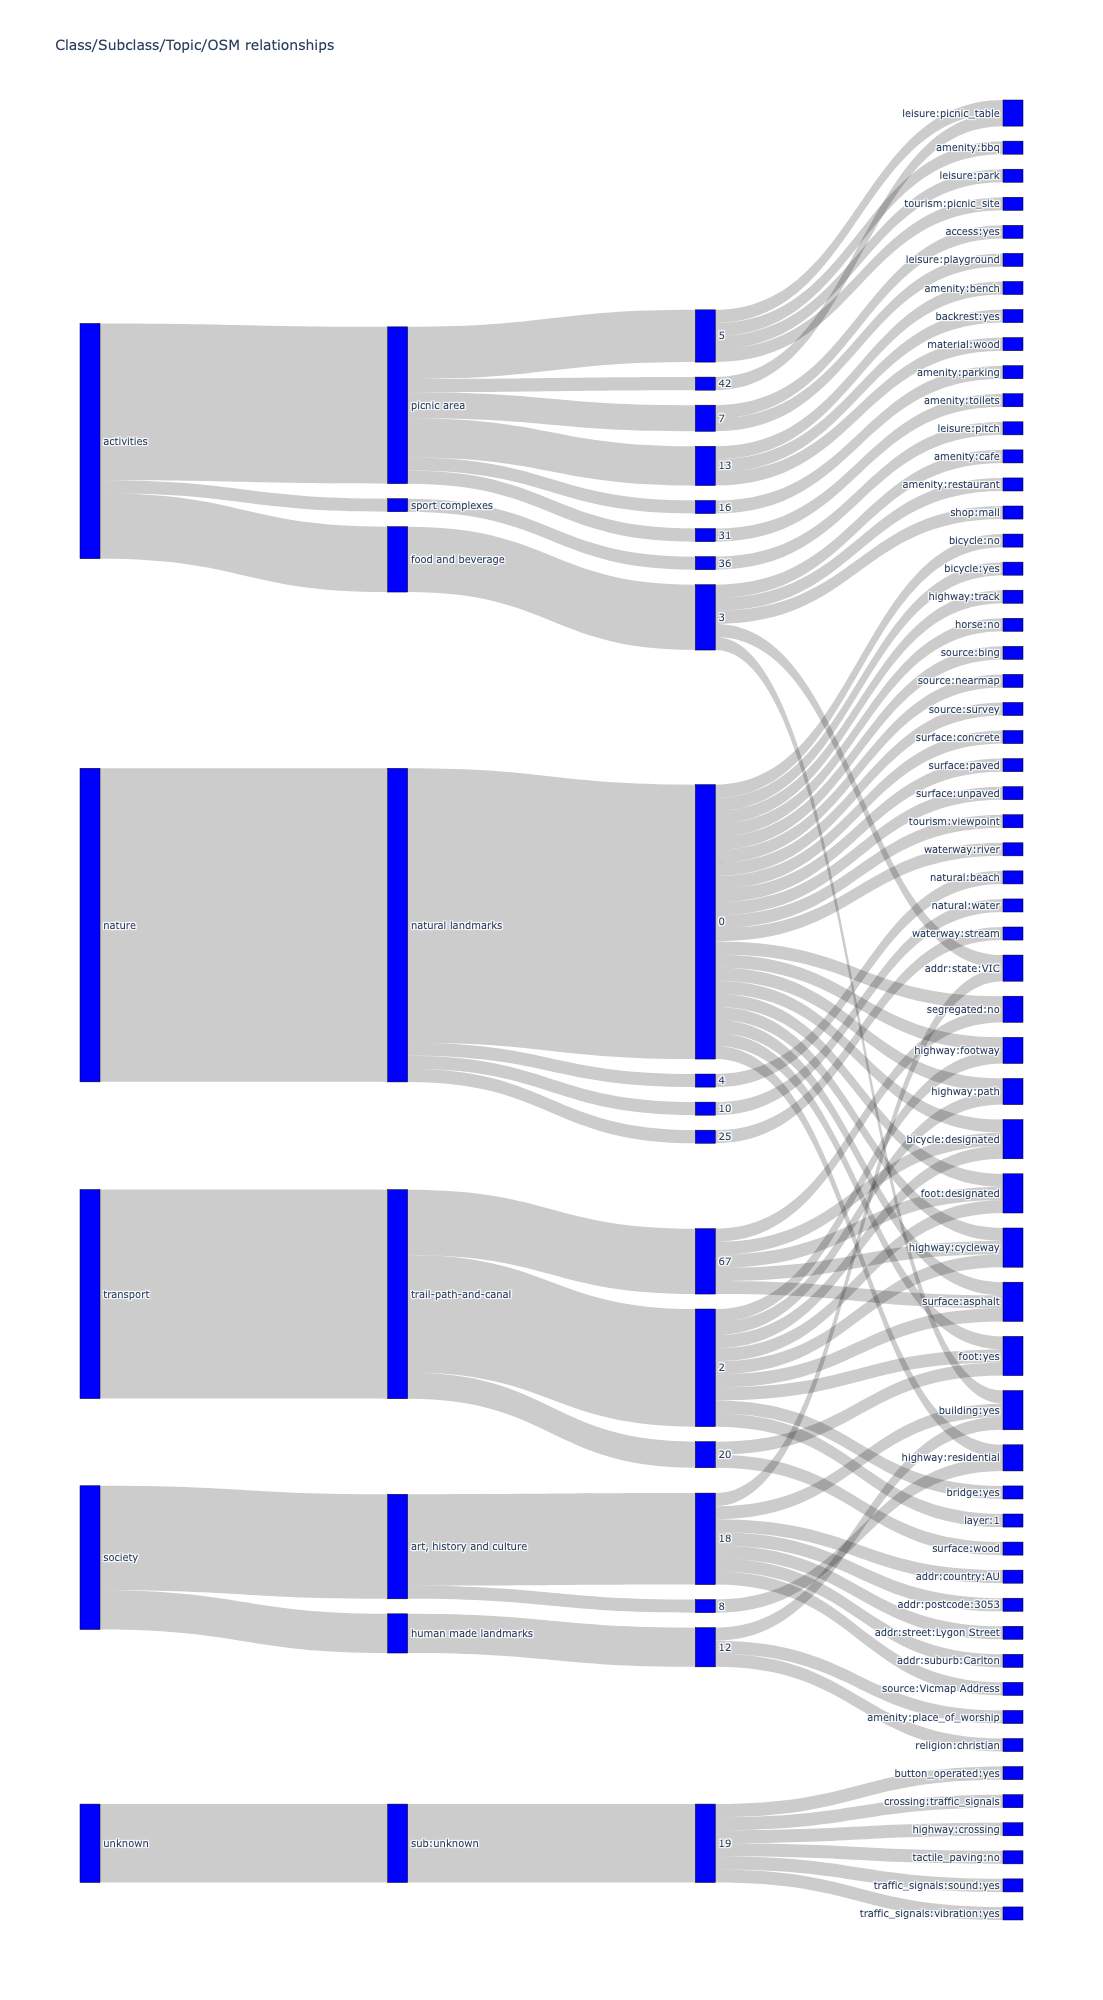

In [69]:
import plotly.graph_objects as go

# add the part that how many of each topic/class/subclass are actually matched as the figure only shows the key-vals which belong to matched results...

# how much these classes overlap by key-val (intersection/union)

filter_value_th = 1

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      # source = [s for idx, s in enumerate(source) if value[idx] > filter_value_th],
      # target = [t for idx, t in enumerate(target) if value[idx] > filter_value_th],
      # value = [v for v in value if v > filter_value_th]
        source = source,
        target = target,
        value = value
  ))])

fig.update_layout(title_text="Class/Subclass/Topic/OSM relationships", font_size=10, width=1200, height=2000)
fig.show()
fig.write_html("outputs/figure/class-subclass-topic-osm-sankeychart.html")

#### Matched or Not Matched?

Investigate what proportion of each topic/subclass/class matched with OSM results...

In [92]:
unmatched_keys = [key for key,val in annotations.items() if len(val) == 0]
logger.info(f'out {len(annotations.keys())}, {len(unmatched_keys)} POIs are not matched')

2024-12-21 17:50:47.649 | INFO     | __main__:<module>:2 - out 4386, 1994 POIs are not matched


In [137]:
matched_unmatched = []
matched_values = {'single': 0, 'no_match': 0, 'multi': 0, 'all': 0}
no_match_poiids = []
counts = 0
multicounts = 0
for key, value in tqdm.tqdm(nominatim_output.items()):
    matched_values['all'] += 1
    if key in annotations:
        d_row = detailed_df[detailed_df['index']==int(key)]
        record = {'status': None, 
                        'class': list(d_row['Class'])[0],
                        'subclass': list(d_row['Subclass'])[0], 
                        'topic': list(d_row['topic'])[0]}
        if key in unmatched_keys:
            record['status'] = 'not matched'
            matched_values['no_match'] += 1
            no_match_poiids.append(key)
        else:
            if key not in matched_lw_osm.keys():
                matched_values['no_match'] += 1
                no_match_poiids.append(key)
                continue
            if len(matched_lw_osm[key]) == 1:
                record['status'] = 'single match'
                matched_values['single'] += 1
                counts += len(matched_lw_osm[key])
            elif len(matched_lw_osm[key]) > 1:
                record['status'] = 'multiple matches'
                matched_values['multi'] += 1
                counts += len(matched_lw_osm[key])
                multicounts += len(matched_lw_osm[key])
            else:
                logger.warning(f'something fishy happening with POI {key}')
        matched_unmatched.append(record)
    else:
        matched_values['no_match'] += 1
        no_match_poiids.append(key).append(key)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4392/4392 [00:02<00:00, 1465.57it/s]


In [138]:
matched_values

{'single': 2022, 'no_match': 2007, 'multi': 363, 'all': 4392}

In [104]:
counts

3119

In [105]:
multicounts

1097

In [106]:
m_um_df = pd.DataFrame(matched_unmatched)
m_um_df.head()

status   class           subclass  topic
0  single match  nature  natural landmarks      2
1  single match  nature  natural landmarks      2
2   not matched  nature     flora and funa      1
3   not matched  nature  natural landmarks      2
4  single match  nature  natural landmarks     23

In [107]:
m_um_df['counts'] = 1

In [108]:
m_um_df['subclass'].unique()

array(['natural landmarks', 'flora and funa', 'sport complexes',
       'fishing to surfing', 'unknown', 'art, history and culture',
       'trail-path-and-canal', 'picnic', 'human made landmarks',
       'food and beverage', 'lines and stations'], dtype=object)

In [109]:
m_um_df['class'].unique()

array(['nature', 'activities', 'unknown', 'society', 'transport'],
      dtype=object)

In [110]:
m_um_df['class'].unique()

array(['nature', 'activities', 'unknown', 'society', 'transport'],
      dtype=object)

In [111]:
# correct naming
class_dict = {'nature': 'Nature-related', 'activities': 'Activity-related', 
              'unknown': 'Unknown', 'society': 'Society-related', 'transport': 'Transport-related'}
subclass_dict = {'natural landmarks': 'natural landmarks', 
                 'flora and funa': 'flora and fauna', 
                 'sport complexes': 'sport',
                 'fishing to surfing': 'aquatic', 
                 'unknown': 'unknown', 
                 'art, history and culture': 'art, history and culture',
                 'trail-path-and-canal': 'trails, paths and canals', 
                 'picnic': 'picnic and camping', 
                 'human made landmarks': 'human made landmarks',
                 'food and beverage': 'food and beverage', 'lines and stations': 'lines and stations'}

def correct_naming(row):
    row['class'] = class_dict[row['class']]
    row['subclass'] = subclass_dict[row['subclass']]
    return row

m_um_df = m_um_df.apply(correct_naming, axis=1)

In [112]:
m_um_df = m_um_df[m_um_df['class'] != 'Unknown']

In [113]:
m_um_df['subclass'].unique()

array(['natural landmarks', 'flora and fauna', 'sport', 'aquatic',
       'art, history and culture', 'trails, paths and canals',
       'picnic and camping', 'human made landmarks', 'food and beverage',
       'lines and stations'], dtype=object)

In [114]:
m_um_df['class'].unique()

array(['Nature-related', 'Activity-related', 'Society-related',
       'Transport-related'], dtype=object)

In [115]:
m_um_df['status'] = pd.Categorical(m_um_df['status'], categories=['not matched', 'single match', 'multiple matches'])
m_um_df['class'] = pd.Categorical(m_um_df['class'], categories=['Nature-related', 'Activity-related', 'Society-related', 'Transport-related'])
m_um_df['subclass'] = pd.Categorical(m_um_df['subclass'], categories=['flora and fauna', 'natural landmarks',
                                                                      'aquatic', 'picnic and camping', 'food and beverage', 'sport',
                                                                      'human made landmarks', 'art, history and culture',
                                                                      'trails, paths and canals', 'lines and stations'
                                                                     ])

In [116]:
class_m_um_df = m_um_df.groupby(['class', 'status'])['counts'].sum().reset_index()
subclass_m_um_df = m_um_df.groupby(['subclass', 'status'])['counts'].sum().reset_index()

In [117]:
class_m_um_df['precentage'] = class_m_um_df['counts'] / class_m_um_df.groupby('class')['counts'].transform('sum')
subclass_m_um_df['precentage'] = subclass_m_um_df['counts'] / subclass_m_um_df.groupby('subclass')['counts'].transform('sum')

In [118]:
colors = sns.color_palette("hls", 3)
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

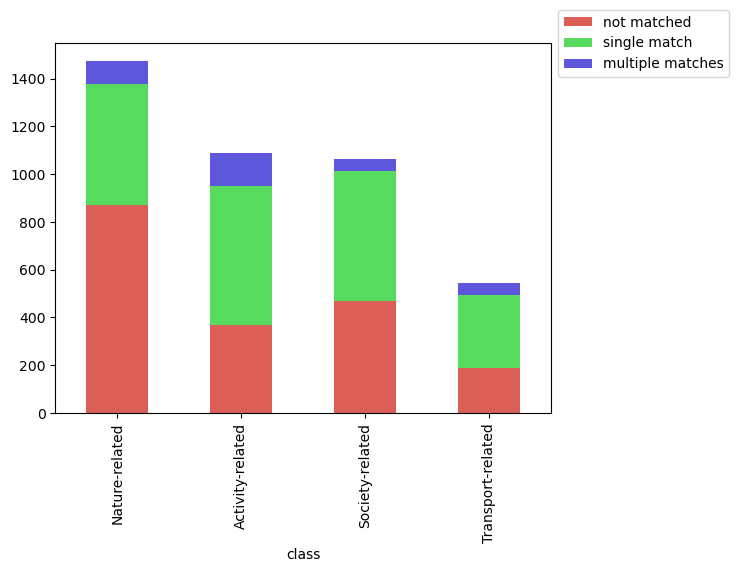

In [119]:
f = plt.figure()
class_m_um_df.pivot_table(
    index = 'class', columns = 'status' , values = 'counts').plot(
    kind = 'bar', stacked = True, color=colors, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.show()

<Figure size 640x480 with 0 Axes>

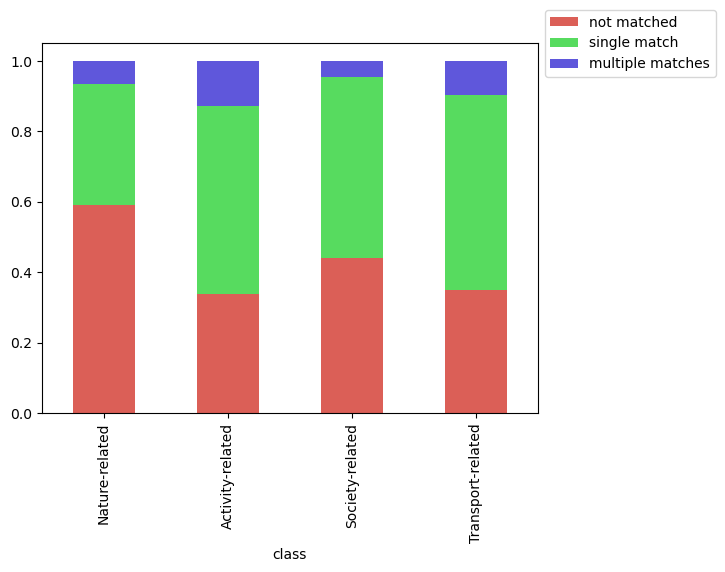

In [120]:
f = plt.figure()
class_m_um_df.pivot_table(
    index = 'class', columns = 'status' , values = 'precentage').plot(
    kind = 'bar', stacked = True, color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.show()

<Figure size 640x480 with 0 Axes>

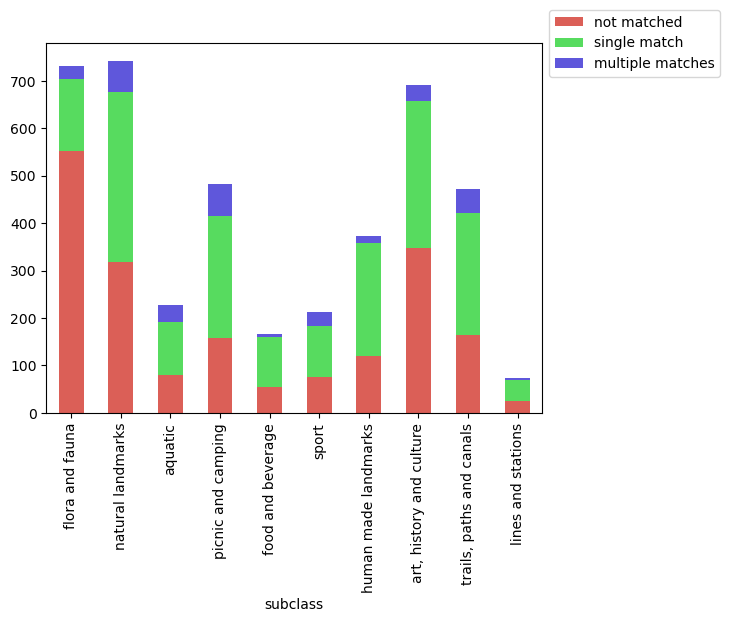

In [121]:
f = plt.figure()
subclass_m_um_df.pivot_table(
    index = 'subclass', columns = 'status' , values = 'counts').plot(
    kind = 'bar', stacked = True, color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.show()

<Figure size 640x480 with 0 Axes>

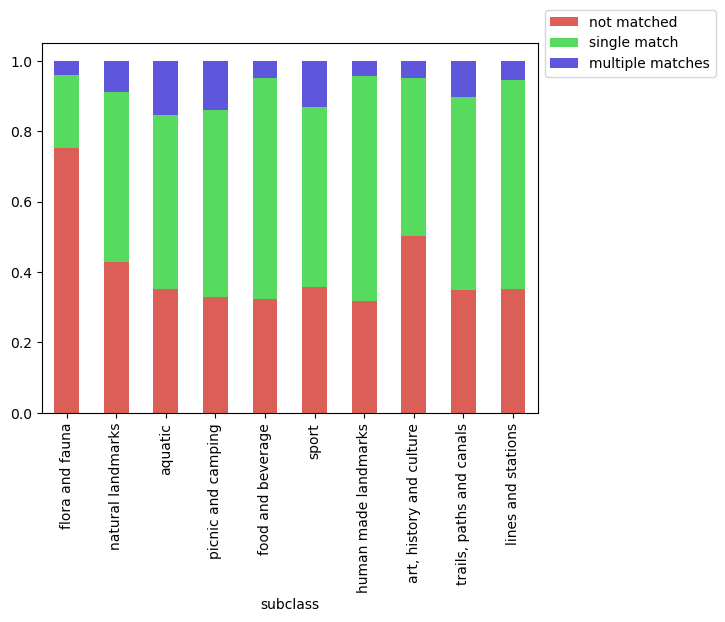

In [122]:
f = plt.figure()
subclass_m_um_df.pivot_table(
    index = 'subclass', columns = 'status' , values = 'precentage').plot(
    kind = 'bar', stacked = True, color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [123]:
subclass_m_um_df

subclass            status  counts  precentage
0            flora and fauna       not matched     551    0.752732
1            flora and fauna      single match     152    0.207650
2            flora and fauna  multiple matches      29    0.039617
3          natural landmarks       not matched     319    0.429919
4          natural landmarks      single match     357    0.481132
5          natural landmarks  multiple matches      66    0.088949
6                    aquatic       not matched      80    0.352423
7                    aquatic      single match     112    0.493392
8                    aquatic  multiple matches      35    0.154185
9         picnic and camping       not matched     158    0.327801
10        picnic and camping      single match     257    0.533195
11        picnic and camping  multiple matches      67    0.139004
12         food and beverage       not matched      54    0.323353
13         food and beverage      single match     105    0.628743
14         food and beverage  multiple matches       8    0.047904
15                     sport       not matched      76    0.358491
16                     sport      single match     108    0.509434
17                     sport  multiple matches      28    0.132075
18      human made landmarks       not matched     119    0.319035
19      human made landmarks      single match     238    0.638070
20      human made landmarks  multiple matches      16    0.042895
21  art, history and culture       not matched     348    0.503618
22  art, history and culture      single match     310    0.448625
23  art, history and culture  multiple matches      33    0.047757
24  trails, paths and canals       not matched     164    0.348195
25  trails, paths and canals      single match     258    0.547771
26  trails, paths and canals  multiple matches      49    0.104034
27        lines and stations       not matched      26    0.351351
28        lines and stations      single match      44    0.594595
29        lines and stations  multiple matches       4    0.054054

In [125]:
nominatim_output

{'0': {'walk_id': 1,
  'title': 'Fairhaven Surf Life Saving Club',
  'summary': 'Fairhaven is a well known surf beach. The beach is patrolled during December to the Easter. The Fairhaven SLSC was established in 1958.',
  'lat': -38.46875894,
  'lng': 144.08445884,
  'osm': None},
 '1': {'walk_id': 1,
  'title': 'Beach walk',
  'summary': 'From Sprout Creek, Eastern View, Moggs Creek, Fairhaven to the bottom of the light house there is approx 6 km of beach, featuring rolling surf and spectacular views of the Otway Ranges and Lorne.',
  'lat': -38.46854155,
  'lng': 144.08969344,
  'osm': None},
 '2': {'walk_id': 1,
  'title': 'Rock pools',
  'summary': 'See what sort of shells and stones you can collect. Can you find a bright red sea star? You can see all sorts of sea vegetation, small fish and crabs. Look at the bird life, gulls and cormorants.',
  'lat': -38.4684592,
  'lng': 144.09241977,
  'osm': None},
 '3': {'walk_id': 1,
  'title': 'Sand dunes',
  'summary': 'The beautiful rollin

In [126]:
matched_lw_osm

{'0': [{'osm': {'type': 'way',
    'id': 1089591567,
    'timestamp': '2022-08-27T02:26:39Z',
    'version': 1,
    'changeset': 125428230,
    'user': 'Warin61',
    'uid': 1830192,
    'nodes': [6219734685,
     9980920680,
     9980920679,
     9980920678,
     9980920677,
     9980920676,
     9980920675,
     9980920674,
     6219734685],
    'tags': {'addr:housenumber': '370',
     'addr:postcode': '3231',
     'addr:street': 'Great Ocean Road',
     'club': 'surf_life_saving',
     'emergency': 'lifeguard',
     'lifeguard': 'base',
     'name': 'Fairhaven Surf Life Saving Club'}},
   'class': 'nature',
   'subclass': 'natural landmarks',
   'topic': 4}],
 '1': [{'osm': {'type': 'way',
    'id': 1007494584,
    'timestamp': '2021-12-06T00:56:58Z',
    'version': 2,
    'changeset': 114599022,
    'user': 'anne_fass',
    'uid': 14505999,
    'nodes': [9294714213,
     9294714214,
     9294714215,
     9294714216,
     9294780017,
     9294780018,
     9294780019,
     9294780020

In [141]:
tags_detail_information = []  # {'class', 'subclass', 'topic', 'osm_id', 'poi_id', 'tags'

for poi_id, osms in matched_lw_osm.items():
    if poi_id not in annotations:
        continue
    if poi_id in no_match_poiids:
        continue
    for osm in osms:
        osm_val = osm['osm']
        if "id" not in osm_val.keys():
            tags_detail_information.append({'poi_id': poi_id, 'osm_id': osm_val['place_id'], 
                                            'class': osm['class'], 'subclass': osm['subclass'], 'topic': osm['topic'], 
                                            'tags': {osm_val['class']:osm_val['type']}})
        else:
            tags_detail_information.append({'poi_id': poi_id, 'osm_id': f'{osm_val["type"]}:{osm_val["id"]}', 
                                        'class': osm['class'], 'subclass': osm['subclass'], 'topic': osm['topic'], 
                                        'tags': osm_val['tags'] if 'tags' in osm_val else {}})
len(tags_detail_information)

3119

In [142]:
pd.DataFrame(tags_detail_information)

poi_id            osm_id       class            subclass  topic  \
0         0    way:1089591567      nature   natural landmarks      4   
1         1    way:1007494584      nature   natural landmarks      4   
2         6      way:69366108  activities     sport complexes     23   
3         6   node:5315720235  activities     sport complexes     23   
4         7  node:11158854687  activities  fishing to surfing     29   
...     ...               ...         ...                 ...    ...   
3114   4389    way:1154250924      nature   natural landmarks      0   
3115   4390    way:1110152163  activities         picnic area      7   
3116   4390    way:1110152159  activities         picnic area      7   
3117   4390    way:1110152160  activities         picnic area      7   
3118   4390    way:1110152164  activities         picnic area      7   

                                                   tags  
0     {'addr:housenumber': '370', 'addr:postcode': '...  
1     {'name': 'Fairhaven', 'natural': 'beach', 'sur...  
2                             {'leisure': 'playground'}  
3                           {'leisure': 'picnic_table'}  
4     {'amenity': 'fast_food', 'cuisine': 'fish_and_...  
...                                                 ...  
3114      {'footway': 'sidewalk', 'highway': 'footway'}  
3115                          {'leisure': 'playground'}  
3116                          {'leisure': 'playground'}  
3117                          {'leisure': 'playground'}  
3118                          {'leisure': 'playground'}  

[3119 rows x 6 columns]

In [152]:
c_osm_keys = {}
s_osm_keys = {}
c_osm_keyvalues = {}
s_osm_keyvalues = {}

for tag_detail in tags_detail_information:
    keys = list(tag_detail['tags'].keys())
    keyvalues = [k+':'+v for k,v in tag_detail['tags'].items()]
    
    if tag_detail['class'] not in c_osm_keys.keys():
        c_osm_keys[tag_detail['class']] = []
        c_osm_keyvalues[tag_detail['class']] = []
    
    
    if tag_detail['subclass'] not in s_osm_keys.keys():
        s_osm_keys[tag_detail['subclass']] = []
        s_osm_keyvalues[tag_detail['subclass']] = []

    c_osm_keys[tag_detail['class']].extend(keys)
    c_osm_keyvalues[tag_detail['class']].extend(keyvalues)
    s_osm_keys[tag_detail['subclass']].extend(keys)
    s_osm_keyvalues[tag_detail['subclass']].extend(keyvalues)

In [156]:
from collections import Counter

# for key, info in c_osm_keys.items():
#     info_count = Counter(info)
#     print(f'{key}: {info_count.most_common(6)}')
    
for key, info in c_osm_keyvalues.items():
    info_count = Counter(info)
    print(f'{key}: {info_count.most_common(10)}')

nature: [('foot:yes', 115), ('highway:cycleway', 114), ('highway:path', 82), ('highway:footway', 75), ('natural:water', 65), ('bicycle:designated', 64), ('foot:designated', 63), ('tourism:viewpoint', 61), ('surface:asphalt', 60), ('source:survey', 53)]
activities: [('leisure:park', 105), ('leisure:playground', 104), ('leisure:pitch', 77), ('building:yes', 68), ('access:yes', 59), ('amenity:bench', 43), ('leisure:picnic_table', 42), ('amenity:parking', 38), ('addr:state:VIC', 37), ('amenity:toilets', 36)]
unknown: [('highway:crossing', 33), ('building:yes', 28), ('crossing:traffic_signals', 27), ('tactile_paving:no', 23), ('button_operated:yes', 22), ('traffic_signals:sound:yes', 22), ('traffic_signals:vibration:yes', 22), ('highway:footway', 21), ('surface:asphalt', 16), ('highway:cycleway', 15)]
transport: [('layer:1', 95), ('bridge:yes', 92), ('highway:cycleway', 70), ('foot:yes', 48), ('foot:designated', 46), ('bicycle:designated', 45), ('highway:footway', 43), ('segregated:no', 38)

In [157]:
# for key, info in c_osm_keys.items():
#     info_count = Counter(info)
#     print(f'{key}: {info_count.most_common(6)}')
    
for key, info in s_osm_keyvalues.items():
    info_count = Counter(info)
    print(f'{key}: {info_count.most_common(10)}')
    print('\n')

natural landmarks: [('foot:yes', 102), ('highway:cycleway', 102), ('highway:path', 70), ('bicycle:designated', 58), ('highway:footway', 56), ('foot:designated', 56), ('tourism:viewpoint', 53), ('surface:asphalt', 50), ('segregated:no', 47), ('surface:unpaved', 46)]


sport complexes: [('leisure:pitch', 63), ('leisure:park', 21), ('building:yes', 18), ('leisure:sports_centre', 18), ('sport:tennis', 14), ('sport:cricket', 12), ('leisure:swimming_pool', 11), ('sport:bowls', 11), ('addr:state:VIC', 9), ('lit:yes', 9)]


fishing to surfing: [('man_made:pier', 19), ('building:yes', 13), ('leisure:slipway', 11), ('natural:water', 10), ('area:yes', 9), ('waterway:river', 9), ('leisure:park', 5), ('leisure:sports_centre', 5), ('leisure:marina', 5), ('name:Barwon River', 5)]


unknown: [('highway:crossing', 33), ('building:yes', 28), ('crossing:traffic_signals', 27), ('tactile_paving:no', 23), ('button_operated:yes', 22), ('traffic_signals:sound:yes', 22), ('traffic_signals:vibration:yes', 22), 

### Discussion

Reason for a large proportion of unmatched (missing records) in OSM:

1. flora and fauna: not mapped - enough sample
2. food and beverages: mostly mapped but gets outdated as these places change in few years (COVID in between is also a reason) - also not sufficient data
3. art, history and culture: mostly not mapped or the rich information about them are not captured
4. lines and stations: ??? -- also not sufficient data to make a conclusion yet!


Reasons for multi records:
1. activities --> two reasons based on activities a compound POIs is formed (playgrounds and BBQ places) or detailed mapping: a sport complex is mapped with details (sport facility --> multi building) - ambiguity (fishing piers -- usually there are multiple of them in a neighborhood)

### Matched Records - How long is the distance?

Also consider the context - how big is the walk itself or what's the average distance between POIs in that walk to justify a threshold for finding objects of interest in Visa vs. objects of interest in nearby - then connect it categories and labels

In [128]:
annotations['16']

[['node', '7228362154'], ['way', '32710391']]

In [129]:
import overpass
overpassapi = overpass.API(timeout=600)

RECORD_TEMPALTE = "{rtype}({rid})({bbox});"

def query(rtype, rid):
    query = RECORD_TEMPALTE.format(rtype=rtype, rid=rid, bbox='-41.138526,127.118885,-27.148598,161.923572')
    return overpassapi.get(query, verbosity='geom')

query(rtype='way', rid=1089591567)

{"features": [{"geometry": {"coordinates": [[144.084357, -38.468432], [144.084346, -38.468319], [144.084205, -38.468328], [144.084201, -38.46829], [144.083946, -38.468305], [144.083951, -38.468349], [144.083984, -38.468347], [144.083995, -38.468455], [144.084357, -38.468432]], "type": "LineString"}, "id": 1089591567, "properties": {"addr:housenumber": "370", "addr:postcode": "3231", "addr:street": "Great Ocean Road", "club": "surf_life_saving", "emergency": "lifeguard", "lifeguard": "base", "name": "Fairhaven Surf Life Saving Club"}, "type": "Feature"}], "type": "FeatureCollection"}

In [ ]:
detailed_annotations = {}
for key, values in tqdm.tqdm(annotations.items()):
    detailed_annotations[key] = []
    for value in values:
        rtype = value[0]
        rid = value[1]
        detailed_annotations[key].append(query(rtype=rtype, rid=rid))

In [ ]:
detailed_annotations['16']

In [ ]:
with open('outputs/dataframes/detailed_annotation_results.json', 'w', encoding='utf-8') as fp:
    json.dump(detailed_annotations, fp)

In [ ]:
from shapely.geometry import shape
from shapely.ops import transform


def get_geometry(record):
    return shape(record['features'][0]['geometry'])

In [ ]:
rows = []
for key, record in nominatim_output.items():
    if key not in annotations:
        continue;
        
    matched = detailed_annotations[key]
    if len(matched) == 0:
        continue;

    for matched_record in matched:
        if len(matched_record['features']) == 0:
            continue;
        row = {'walk_id': record['walk_id'], 'poi_id': key,
               'poi_title': record['title'], 'poi_decscription': record['summary'],
           'lat': record['lat'], 'lng': record['lng'], 'geometry': get_geometry(matched_record)}
        rows.append(row)
logger.info(f'number of matched and annotated records: {len(rows)}')

In [ ]:
gdf = gpd.GeoDataFrame(rows, crs="EPSG:4326")
gdf_projected = gdf.to_crs("EPSG:32755")
gdf_projected.explore()

In [ ]:
from pyproj import Transformer
from shapely.geometry import Point

transformer = Transformer.from_crs(4326, 32755, always_xy=True)

def compute_distance(row):
    transformed_point = transform(transformer.transform, Point(row['lng'], row['lat']))
    row['dist'] = transformed_point.distance(row['geometry'])
    return row

In [ ]:
gdf_projected = gdf_projected.apply(compute_distance, axis=1)
gdf_projected

In [ ]:
sns.histplot(gdf_projected.dist, bins=100)

In [ ]:
sns.histplot([d for d in gdf_projected.dist if d < 1000], bins=100)

In [ ]:
sns.histplot(gdf_projected.dist, log_scale=True, bins=100)

In [ ]:
gdf_projected.sort_values(['dist'], ascending=[False]).head(50)

### From OSM POIs to Making Decision For Leisure Walk

Having no prior 

Having prior information about the theme of the walk

Having prior information - a subset of POIs

In [ ]:
gdf_projected.groupby(by='walk_id')['poi_id'].count()

In [199]:
focused_walks = [1,2,3,4,5,6,7,8,13,15,16,18,19]
focused_gdf = gdf_projected[gdf_projected['walk_id'].isin(focused_walks)]
focused_gdf

walk_id poi_id                                  poi_title  \
0          1      0            Fairhaven Surf Life Saving Club   
1          1      1                                 Beach walk   
2          1      6  Aireys Inlet playground and picnic ground   
3          1      6  Aireys Inlet playground and picnic ground   
4          1      7                   Aireys Inlet lower shops   
..       ...    ...                                        ...   
213       19    284                                  The track   
214       19    287                                  The Rocks   
215       19    288                                 To Squeaky   
216       19    289                              Squeaky Beach   
217       19    290                                    The sea   

                                      poi_decscription        lat         lng  \
0    Fairhaven is a well known surf beach. The beac... -38.468759  144.084459   
1    From Sprout Creek, Eastern View, Moggs Creek, ... -38.468542  144.089693   
2    There is small skateboard ramp for children to... -38.466199  144.098772   
3    There is small skateboard ramp for children to... -38.466199  144.098772   
4    Pick up a coffee, newspaper or Fish and Chips!... -38.465536  144.098801   
..                                                 ...        ...         ...   
213             The track appears like a shady tunnel. -39.033178  146.307091   
214  These rocks are like a sculpture and the colou... -39.029542  146.307369   
215  The last part of the path to Squeaky, the anti... -39.028702  146.307507   
216              Don't forget to squeak when you walk! -39.027415  146.307137   
217  Time for a dip? But be careful, it is not a pa... -39.024647  146.304707   

                                              geometry    distance        dist  
0    LINESTRING (245626.149 5738181.179, 245624.792...   37.379334   37.379334  
1    LINESTRING (244099.747 5738111.339, 244107.629...   18.282913   18.282913  
2    LINESTRING (246848.218 5738495.009, 246867.434...   15.271587   15.271587  
3                       POINT (247049.301 5738406.242)  184.075325  184.075325  
4                       POINT (246906.751 5738597.292)   62.682241   62.682241  
..                                                 ...         ...         ...  
213  LINESTRING (440255.995 5679397.972, 440249.609...    0.362170    0.362170  
214  LINESTRING (440375.953 5679079.592, 440301.811...    5.633505    5.633505  
215  LINESTRING (440255.995 5679397.972, 440249.609...    3.759099    3.759099  
216  LINESTRING (439616.953 5680422.768, 439655.497...   34.968112   34.968112  
217                     POINT (439256.730 5679738.804)  761.872302  761.872302  

[198 rows x 9 columns]

In [76]:
# find POIs
# two ways of doing it... bounding box? or/and 200-1000 meters nearby features?
# select all of those features and create a representation for each, then make a labelled data of imbalanced selected - not selected dataset
# then we can check what we can do with it!

In [ ]:
# create a POI list for each walk
